In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
csv = 'SentimentAnal_Data/train.csv'
df = pd.read_csv(csv)
df.head()

,date,text,ton
0,1387295527,Sitemap взятие кредита в сбербанке http://t.co...,0
1,1388477220,"#news Четыре тысячи вкладчиков банка ""Аскольд""...",0
2,1387475723,Янукович #пообещал #вернуть вклады Сбербанка С...,0
3,1387377846,сбербанк навязывает кредитную карту http://t.c...,-1
4,1388479337,С 28 января проезд нельзя будет оплатить карта...,-1


In [4]:
csv_t = 'SentimentAnal_Data/test.csv'
df_test = pd.read_csv(csv_t)
df_test.head()

,date,text,id
0,1447323131,12 ноября День работников Сбербанка России #сб...,0
1,1438372002,@Beeline_RUS так как у меня в ближайшее время ...,1
2,1447332449,Никогда больше не буду работать со Сбербанком ...,2
3,1437970883,#fyseo_ru #финансы Хакеры украли у клиентов «С...,3
4,1436287585,"#мтс вы почините мобильный интернет, нет? Че з...",4


In [5]:
df.ton.value_counts()

 0    11810
-1     4225
 1     2000
Name: ton, dtype: int64

In [6]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [7]:
df_test['pre_clean_len'] = [len(t) for t in df_test.text]

In [8]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.ton.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)

{'dataset_shape': (18035, 4),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


In [9]:
df[df.pre_clean_len > 140].head(10)

,date,text,ton,pre_clean_len
187,1407233837,В Крыму перестал обслуживать абонентов сотовый...,-1,151
308,1406510367,&amp;quot;МегаФон&amp;quot; запустил в пятницу...,0,155
446,1406455866,Фирма &amp;laquo;НИТА&amp;raquo; завершила пос...,0,163
958,1406812037,"Участники розыгрыша «Фортуна», ставшие абонент...",0,143
1118,1407465795,Из средств от&amp;#8230;\nТем временем приоста...,0,143
1245,1406680924,Сотовый оператор &amp;laquo;Мегафон&amp;raquo;...,-1,147
1557,1406553779,Операторы и чиновники спорят о статусе компани...,0,147
1666,1407410591,ОАО &amp;laquo;Ростелеком&amp;raquo; (MOEX: RT...,0,147
1677,1407264055,"В &amp;quot;МТС-Украина&amp;quot; говорят, что...",-1,154
1736,1407330743,Компания &amp;laquo;МегаФон&amp;raquo; совмест...,0,147


In [10]:
df.text[279]

'Михаэль Хеккер из МТС станет вице-президентом АФК «Система» #news'

In [11]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print (example1.get_text())

Михаэль Хеккер из МТС станет вице-президентом АФК «Система» #news


In [12]:
df.text[343]

'http://t.co/EEn0suUf1y По каким дням можно получить кредит в сбербанке'

In [13]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

'http://t.co/EEn0suUf1y По каким дням можно получить кредит в сбербанке'

In [14]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[343])

' По каким дням можно получить кредит в сбербанке'

In [15]:
df.text[226].replace(u"\ufffd", "?")

'@andrey_tr нравится встроенный в альфабанк'

In [16]:
re.sub("[^a-zA-Z]", " ", df.text[175])

'http   t co QQgVdoBNDA                                        http   t co QQgVdoBNDA'

In [17]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [18]:
pat1 = r'@[А-Яа-я0-9]+'
pat2 = r'https?://[А-Яа-я0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^а-яА-Я]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [19]:
testing = df.text[:100]

In [20]:
test_result = []
for t in tqdm(testing):
    test_result.append(tweet_cleaner(t))

In [21]:
test_result

['взятие кредита в сбербанке',
 'четыре тысячи вкладчиков банка аскольд получат возмещение по вкладам асв выбрало втб банк',
 'янукович пообещал вернуть вклады сбербанка ссср',
 'сбербанк навязывает кредитную карту',
 'с января проезд нельзя будет оплатить картами сбербанка и',
 'банк москвы одно из трех финансовых учреждений которое попало под экономические санкции сша',
 'да оно последние несколько дней на мтс криво открывается иногда нормально а иногда отпадает',
 'как россельхозбанк кредитует крестьянские хозяйства ахтубинского района в году',
 'обзор финансово экономической прессы в список санкций ес будут включены сбербанк и втб',
 'как скрыть номер на мегафоне',
 'мтс и ускоряют доступ к зарубежным интернет ресурсам',
 'альфа банк в омске кредит калькулятор',
 'калькулятор расчета ипотечного кредита сбербанк',
 'узбекистан утвердил дорожную карту по созданию сп с мтс',
 'мтс айпад',
 'как взять кредит в россельхозбанке в нальчике',
 'в крыму таки сегодня как и ожидалось отключил

In [22]:
clean_tweet_texts = []
for t in tqdm(df['text']):
    clean_tweet_texts.append(tweet_cleaner(t))

In [23]:
clean_tweet_test = []
for t in tqdm(df_test['text']):
    clean_tweet_test.append(tweet_cleaner(t))

In [24]:
clean_tweet_test[0:5]

['ноября день работников сбербанка россии сбербанк',
 'так как у меня в ближайшее время не будет возможности сделать данный визит но мне отказали и пойдет третий день без связи',
 'никогда больше не буду работать со сбербанком как юридическое лицо',
 'финансы хакеры украли у клиентов сбербанка более млрд рублей вирус списывал деньги со с взаимный читаю',
 'мтс вы почините мобильный интернет нет че за беда с вами']

In [25]:
clean_tweet_texts[0:5]

['взятие кредита в сбербанке',
 'четыре тысячи вкладчиков банка аскольд получат возмещение по вкладам асв выбрало втб банк',
 'янукович пообещал вернуть вклады сбербанка ссср',
 'сбербанк навязывает кредитную карту',
 'с января проезд нельзя будет оплатить картами сбербанка и']

In [26]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.ton
clean_df.head()

,text,target
0,взятие кредита в сбербанке,0
1,четыре тысячи вкладчиков банка аскольд получат...,0
2,янукович пообещал вернуть вклады сбербанка ссср,0
3,сбербанк навязывает кредитную карту,-1
4,с января проезд нельзя будет оплатить картами ...,-1


In [27]:
clean_df_t = pd.DataFrame(clean_tweet_test,columns=['text'])
clean_df_t.head()

,text
0,ноября день работников сбербанка россии сбербанк
1,так как у меня в ближайшее время не будет возм...
2,никогда больше не буду работать со сбербанком ...
3,финансы хакеры украли у клиентов сбербанка бол...
4,мтс вы почините мобильный интернет нет че за б...


In [28]:
clean_df.to_csv('SentimentAnal_Data/clean_tweet.csv',encoding='utf-8')

In [2]:
csv = 'SentimentAnal_Data/clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,взятие кредита в сбербанке,0
1,четыре тысячи вкладчиков банка аскольд получат...,0
2,янукович пообещал вернуть вклады сбербанка ссср,0
3,сбербанк навязывает кредитную карту,-1
4,с января проезд нельзя будет оплатить картами ...,-1


In [3]:
clean_df_t.to_csv('SentimentAnal_Data/clean_tweet_test.csv',encoding='utf-8')
csv_t = 'SentimentAnal_Data/clean_tweet_test.csv'
my_df_t = pd.read_csv(csv_t,index_col=0)
my_df_t.head()

NameError: name 'clean_df_t' is not defined

In [4]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18034 entries, 0 to 18033
Data columns (total 2 columns):
text      18034 non-null object
target    18034 non-null int64
dtypes: int64(1), object(1)
memory usage: 281.9+ KB


In [32]:
my_df_t.dropna(inplace=True)
my_df_t.reset_index(drop=True,inplace=True)
my_df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 1 columns):
text    5560 non-null object
dtypes: object(1)
memory usage: 43.5+ KB


In [5]:
x = my_df.text
y = my_df.target

In [34]:
x_t = my_df_t.text

In [6]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [7]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 17673 entries with 65.46% negative, 11.10% positive
Validation set has total 180 entries with 67.78% negative, 8.89% positive
Test set has total 181 entries with 65.19% negative, 12.15% positive


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
x_train_tfidf = tvec1.transform(x_train)

In [15]:
x_test_tfidf = tvec1.transform(x_t)

NameError: name 'x_t' is not defined

In [16]:
x_validation_tfidf = tvec1.transform(x_validation).toarray()

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lucius/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
clf.score(x_validation_tfidf, y_validation),clf.score(x_train_tfidf, y_train)

(0.78888888888888886, 0.87065014428789678)

In [9]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [10]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

In [11]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [17]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=100000))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor of shape [100000,256] and type float
	 [[node training/Adam/zeros_8 (defined at /home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:702) ]]

Caused by op 'training/Adam/zeros_8', defined at:
  File "/home/lucius/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/lucius/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/events.py", line 126, in _run
    self._callback(*self._args)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-3bdc69fa1e55>", line 13, in <module>
    steps_per_epoch=x_train_tfidf.shape[0]/32)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py", line 40, in fit_generator
    model._make_train_function()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 488, in get_updates
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 488, in <listcomp>
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 702, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1817, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3367, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [100000,256] and type float
	 [[node training/Adam/zeros_8 (defined at /home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:702) ]]


In [18]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [19]:
model_n = Sequential()
model_n.add(Dense(64, activation='relu', input_dim=100000))
model_n.add(Dense(1, activation='sigmoid'))
model_n.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_n.fit_generator(generator=batch_generator(x_train_tfidf_norm, y_train, 32),
                    epochs=5, validation_data=(x_validation_tfidf_norm, y_validation),
                    steps_per_epoch=x_train_tfidf_norm.shape[0]/32)

Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor of shape [100000,64] and type float
	 [[node training_1/Adam/zeros_4 (defined at /home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:702) ]]

Caused by op 'training_1/Adam/zeros_4', defined at:
  File "/home/lucius/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/lucius/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/lucius/anaconda3/lib/python3.6/asyncio/events.py", line 126, in _run
    self._callback(*self._args)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3220, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f78dae839478>", line 10, in <module>
    steps_per_epoch=x_train_tfidf_norm.shape[0]/32)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training_generator.py", line 40, in fit_generator
    model._make_train_function()
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/engine/training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 488, in get_updates
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/optimizers.py", line 488, in <listcomp>
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 702, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1817, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3367, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/lucius/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [100000,64] and type float
	 [[node training_1/Adam/zeros_4 (defined at /home/lucius/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:702) ]]


In [ ]:
def batch_generator_shuffle(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

In [ ]:
import keras
custom_adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model_testing_2 = Sequential()
model_testing_2.add(Dense(256, activation='relu', input_dim=100000))
model_testing_2.add(BatchNormalization())
model_testing_2.add(Dropout(0.4))
model_testing_2.add(Dense(128, activation='relu', input_dim=100000))
model_testing_2.add(BatchNormalization())
model_testing_2.add(Dense(64, activation='relu'))
model_testing_2.add(Dropout(0.2))
model_testing_2.add(Dense(1, activation='sigmoid'))
model_testing_2.compile(optimizer=custom_adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist_t2 = model_testing_2.fit_generator(generator=batch_generator_shuffle(x_train_tfidf, y_train, 32),
                        epochs=1, validation_data=(x_validation_tfidf, y_validation),
                        steps_per_epoch=x_train_tfidf.shape[0]/32)
                        

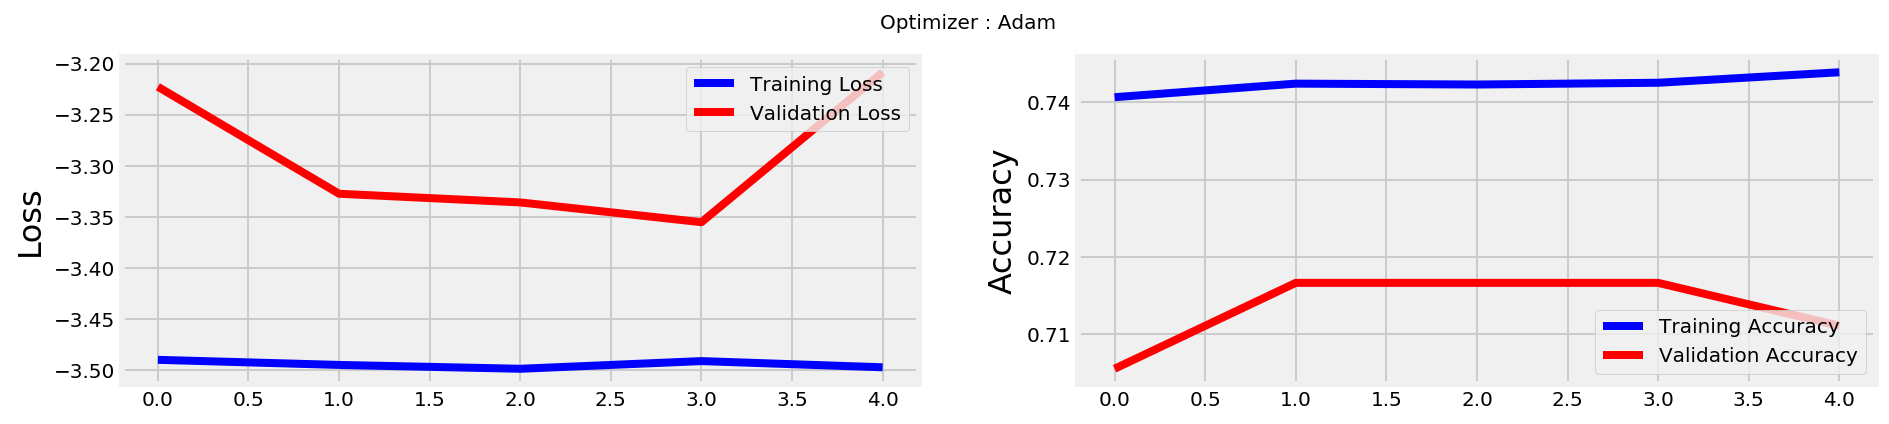

In [62]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist_t2.history['loss'], color='b', label='Training Loss')
plt.plot(hist_t2.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist_t2.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist_t2.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [74]:
score = model_testing_2.evaluate(x_train_tfidf, y_train, verbose=0)

In [75]:
print(model_testing_2.metrics_names)
print(score)

['loss', 'acc']
[-3.5398518411168718, 0.74758105584958989]


In [65]:
model_file_name = '0.72_test'
# save best weights
model.save_weights(model_file_name +"_model.h5")

# save model to json
model_json = model.to_json()
with open(model_file_name+"_model.json", "w") as json_file:
    json_file.write(model_json)

# save description
#with open(model_file_name+ "_model.txt", "w") as txt_file:
#    txt_file.write('model.compile(Adam(1e-4), loss=\'categorical_crossentropy\', metrics=[\'accuracy\']) \
#    shuffle=True, batch_size=100, validation_split=0.2, epoch = 254, val_acc = 0.5684, acc = 0.5669, \
#                  accuracy_score(y_test_c, np.argmax(model.predict(X_test), axis=1)) = 0.5827')

NameError: name 'model' is not defined

In [80]:
from sklearn.metrics import f1_score

In [82]:
y_pred = np.argmax(model_testing_2.predict(x_validation_tfidf), axis=1)
f1_score(x_validation_tfidf, y_validation, average='samples')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [66]:
data_final = np.argmax(model_testing_2.predict(x_test_tfidf), axis=1)

In [67]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
data_final

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
(data_final != 0).sum()

0

In [70]:
final_dataframe = pd.DataFrame(data_final.T, index = df_test.index)
final_dataframe.columns = ['ton']
final_dataframe.index.names = ['id']
final_dataframe.head(1)

,ton
id,
0,0


In [71]:
final_dataframe.to_csv('SentimentTest_21.05.2019_18:52.csv', index='False')
final_dataframe.head(10)

,ton
id,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [72]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [ ]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [ ]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [ ]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

In [ ]:
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

In [ ]:
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

In [ ]:
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha


In [ ]:
model_ug_cbow.save('w2v_model_ug_cbow.word2vec')
model_ug_sg.save('w2v_model_ug_sg.word2vec')

In [ ]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
x_train_seq = pad_sequences(sequences, maxlen=45)

In [ ]:
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen=45)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_seq, y_train)

In [ ]:
clf.score(x_val_seq, y_validation),clf.score(x_train_seq, y_train)

In [ ]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [ ]:
seed = 7

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding